In [12]:
import pandas as pd


filepath = r"C:\Users\srash\OneDrive\Documents\Semester01_Subjects\601-Intro_DataScience\RollingSystemDemand_20210929_2142.csv"
df = pd.read_csv(filepath,names=['HDR','Date&Time','Demand'])

# Removing all the empty rows
df.dropna(axis = 0,how='any',inplace = True)


df['Timestamp'] = pd.to_datetime(df['Date&Time'])
df['date'] = pd.to_datetime(df['Date&Time'],errors='coerce').dt.date
df['hour'] = pd.to_datetime(df['Date&Time'],errors='coerce').dt.hour
df['hrs'] = pd.to_datetime(df['Date&Time'],errors='coerce').dt.hour
df['Demand']= df['Demand'].astype(int)
   

new_df = df.groupby('hour').mean()
new_df['hrs'] = new_df['hrs']+1

df.head(15)


,HDR,Date&Time,Demand,Timestamp,date,hour,hrs
1,VD,20210919000000,21638,2021-09-19 00:00:00,2021-09-19,0,0
2,VD,20210919000500,21678,2021-09-19 00:05:00,2021-09-19,0,0
3,VD,20210919001000,21640,2021-09-19 00:10:00,2021-09-19,0,0
4,VD,20210919001500,21618,2021-09-19 00:15:00,2021-09-19,0,0
5,VD,20210919002000,21676,2021-09-19 00:20:00,2021-09-19,0,0
6,VD,20210919002500,21659,2021-09-19 00:25:00,2021-09-19,0,0
7,VD,20210919003000,21642,2021-09-19 00:30:00,2021-09-19,0,0
8,VD,20210919003500,21689,2021-09-19 00:35:00,2021-09-19,0,0
9,VD,20210919004000,21658,2021-09-19 00:40:00,2021-09-19,0,0
10,VD,20210919004500,21580,2021-09-19 00:45:00,2021-09-19,0,0


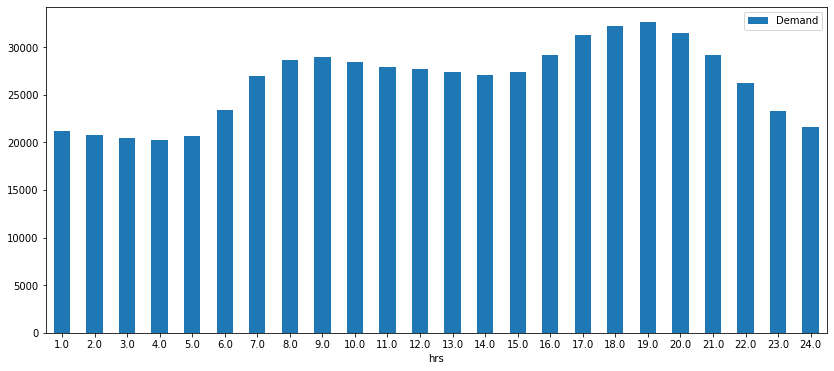

In [13]:
ax = new_df.plot.bar(x='hrs',y='Demand',rot = 0,figsize=(14,6))

In [14]:
df_new = df.groupby(['date','hour']).mean()
df_new['hrs'] = df_new['hrs']+1
df_new

Demand   hrs
date       hour                    
2021-09-19 0     21582.083333   1.0
           1     20753.083333   2.0
           2     20002.916667   3.0
           3     19742.666667   4.0
           4     20000.166667   5.0
...                       ...   ...
2021-09-25 18    30773.250000  19.0
           19    29616.583333  20.0
           20    27632.583333  21.0
           21    25569.500000  22.0
           22    23432.375000  23.0

[167 rows x 2 columns]

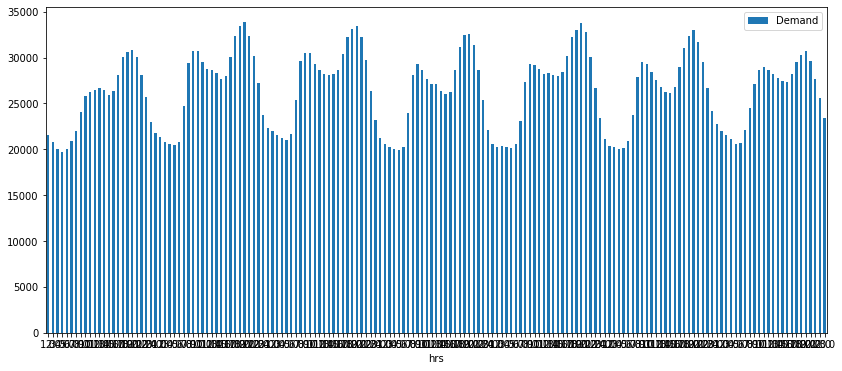

In [15]:
# ax_1 = df_new.plot.line(x='Hours',y='Demand',rot = 0,figsize=(14,6))
ax = df_new.plot.bar(x='hrs',y='Demand',rot = 0,figsize=(14,6))